In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# generate training data from sin function
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# add som
y[::5] += 3 * (0.5 - np.random.rand(8))

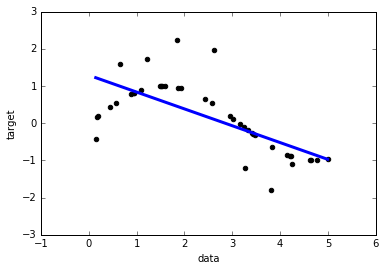

('Coefficients: \n', array([-0.45258396]))
Mean squared error: 0.47
Variance score: 0.48


In [5]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

plt.scatter(X, y,  color='black')
plt.plot(
    X, 
    regr.predict(X), 
    color='blue',
    linewidth=3
)
plt.xlabel('data')
plt.ylabel('target')
plt.show()

print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f" % np.mean((regr.predict(X) - y) ** 2))
print('Variance score: %.2f' % regr.score(X, y))

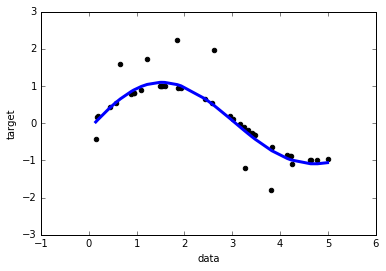

Mean squared error: 0.19
Variance score: 0.79


In [6]:
from sklearn.svm import SVR

regr = SVR(kernel='rbf', C=1e2, gamma=0.1)
regr.fit(X, y)

plt.scatter(X, y,  color='black')
plt.plot(
    X, 
    regr.predict(X), 
    color='blue',
    linewidth=3
)
plt.xlabel('data')
plt.ylabel('target')
plt.show()

print("Mean squared error: %.2f" % np.mean((regr.predict(X) - y) ** 2))
print('Variance score: %.2f' % regr.score(X, y))